## Getting embeddings for images

In this notebook we will go through the different functions used to get the embeddings of different images.

### Importing libraries

In [1]:
import sys
import os
import json
sys.path.append('/opt/workspace/src/python_scripts/')
from ops_face_detection import get_embeddings_from_image, get_actors_embeddings
path_arr = os.getcwd().split(os.path.sep)
os.chdir(os.path.sep.join(path_arr[:path_arr.index('src')+1]))

Installing packages...
Packages installed.
Installing packages...
Packages installed.


### Getting embeddings for one image

We can easily get the embeddings for an image by providing the path to function `get_embeddings_from_image`

Number of embeddings generated: 1
Embeddings metadata: 

{
    "img_path": "./datasets/actor_faces/2037_cillian_murphy/cillian_murphy_1.jpg",
    "scanned_faces": "1",
    "face_confidence": [
        "0.9998857"
    ],
    "scan_time": "0.05543160438537598",
    "emb_time": "0.016635656356811523"
}


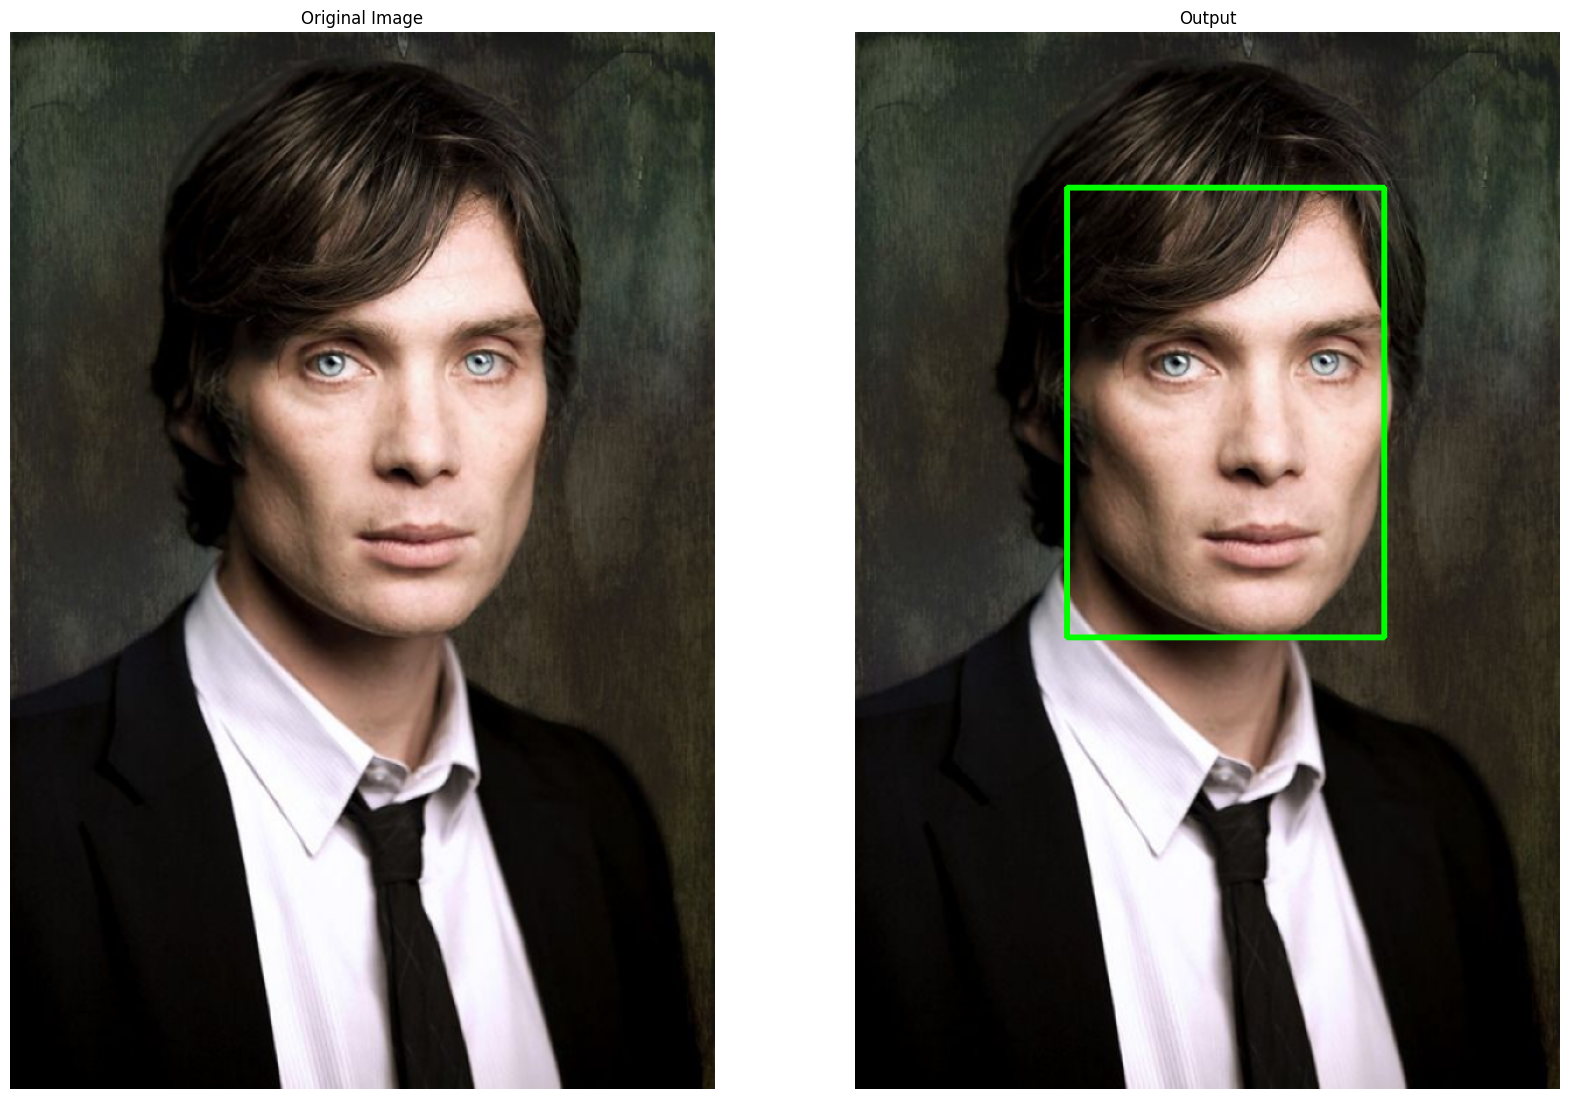

In [2]:
image_path = './datasets/actor_faces/2037_cillian_murphy/cillian_murphy_1.jpg'
image_embeddings, image_embeddings_metadata = get_embeddings_from_image(
    img_path = image_path, 
    display = True
)

print(f'Number of embeddings generated: {len(image_embeddings)}')
print(f'Embeddings metadata: \n')
print(json.dumps(image_embeddings_metadata,indent=4))

We can also detect more than one face if the `multiple_faces` parameter is enabled

In [ ]:
image_path = './datasets/two_persons.jpeg'
image_embeddings, image_embeddings_metadata = get_embeddings_from_image(
    img_path = image_path, 
    multiple_faces=True, 
    display = True
)

print(f'Number of embeddings generated: {len(image_embeddings)}')
print(f'Embeddings metadata: \n')
print(json.dumps(image_embeddings_metadata,indent=4))

### Getting embeddings for a whole dataset of actors

We can also provide a specific dataset folder and then scan all the images contained, with it respective metadata

In [3]:
dataset_folder = './datasets/actor_faces'
actor_embeddings, actor_embeddings_metadata = get_actors_embeddings(dataset_folder)

print(f'Keys from resulting embeddings dictionary: {actor_embeddings.keys()} \n')
print(f'First embeddings for actor {actor_embeddings["names"][0]}:\
    \n {actor_embeddings["embeddings"][0]} \n')
print(f'Keys for resulting metadata dictionary: {actor_embeddings_metadata.keys()}')

2022-09-11 10:33:34,279 - get_actors_embeddings - INFO - Totals actors retrieved: 12.
2022-09-11 10:33:36,694 - get_actors_embeddings - ERROR - ('The image provided is not withing the admited file formats', 'gif')
libpng warning: iCCP: known incorrect sRGB profile
2022-09-11 10:33:42,316 - get_actors_embeddings - ERROR - ('The image provided is not withing the admited file formats', 'gif')
2022-09-11 10:33:50,243 - get_actors_embeddings - ERROR - ('The image provided is not withing the admited file formats', 'gif')
2022-09-11 10:34:09,921 - get_actors_embeddings - ERROR - ('The image provided is not withing the admited file formats', 'gif')
2022-09-11 10:34:13,759 - get_actors_embeddings - INFO - Embedding extraction finished. Exec time: 39.53961133956909.


Keys from resulting embeddings dictionary: dict_keys(['embeddings', 'names']) 

First embeddings for actor 13022_tom_berenger:    
 [array([ 0.05363427,  0.08237647,  0.07133867, -0.08450065, -0.05729557,
        0.1329072 ,  0.02037616, -0.02108232, -0.07761042,  0.08460303,
        0.03742927, -0.05730134, -0.03001598, -0.03070241,  0.137716  ,
       -0.13999826, -0.03567865, -0.02111865,  0.15946339, -0.07004827,
       -0.03976703,  0.18252915, -0.11172291,  0.0903661 , -0.03272247,
        0.11721567,  0.05228765, -0.07805184,  0.09169374,  0.03630124,
       -0.0515903 , -0.18422009, -0.08546445, -0.04190549,  0.15799879,
        0.0374699 ,  0.05894063, -0.0187479 ,  0.04828661,  0.03998445,
       -0.02324551, -0.02787499, -0.13748023,  0.08818167, -0.07671346,
        0.15370229,  0.06549346,  0.04324419, -0.07981753, -0.05749231,
        0.06968746,  0.18037128,  0.02157091,  0.01223522,  0.09332126,
        0.02023799,  0.01910261,  0.05198315, -0.01169172, -0.04814925,
   

### Creating an embeddings model

We can save create different embeddings models using different datasets of different number of images. This function will allow us to have a clear track of
every model by storing this information in an index

In [ ]:
dataset_folder = './datasets/actor_faces'
models_folder = './models/embeddings/actor_faces'
actor_embeddings, actor_embeddings_metadata = get_actors_embeddings(
    dataset_folder,
    save_to_pickle=True,
    output_folder=models_folder
)